In [26]:
import pandas as pd

In [56]:
from sentence_transformers import SentenceTransformer

In [86]:
# Download from the 🤗 Hub
modelEmbedding = SentenceTransformer("iris49/3gpp-embedding-model-v0")

In [149]:
# Read the text file
with open("tone_v1.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Process each line and split at " || "
data = [line.strip().split(" || ") for line in lines]

# Create a DataFrame
df = pd.DataFrame(data, columns=["Text", "Category"])
df.Category.replace(to_replace='Appreciative.', value='Appreciative', inplace= True)

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_59928/3011104271.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Category.replace(to_replace='Appreciative.', value='Appreciative', inplace= True)


In [150]:
def getEmbeddings (text):
    res = modelEmbedding.encode(text)
    return res

In [151]:
df['Embeddings'] = df['Text'].apply(getEmbeddings)

In [152]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Text,Category,Embeddings
0,I am so angry I could scream.,Angry,"[-0.061675172, 0.015449375, -0.037039384, -0.0..."
1,Your sense of humor and wit always bring a smi...,Appreciative,"[-0.027171826, 0.042368427, 0.028204698, 0.013..."
2,"I want to be passionate about my work, but I a...",Ambivalent,"[0.06257406, 0.00049284846, 0.037041724, -0.07..."
3,"""Never give up on what sets your soul on fire""",Inspirational,"[0.0013275763, -0.025471302, -0.016645541, 0.0..."
4,I feel like I have been hurt.,Aggrieved,"[-0.026870718, -0.02349058, -0.009104158, -0.0..."
...,...,...,...
3351,I feel so small in the presence of such greatn...,Assertive,"[-0.03945503, -0.023671228, 0.051135935, -0.03..."
3352,We should always strive to be inclusive and ac...,Thoughtful,"[0.014629823, 0.037260395, -0.010248647, -0.01..."
3353,The United States is the third largest country...,Informative,"[-0.0058121807, 0.0028974938, 0.0098307775, 0...."
3354,The Great Barrier Reef is the largest coral re...,Informative,"[-0.032931615, -0.01974519, -0.025533421, 0.03..."


In [153]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np

In [154]:
LE = LabelEncoder()
df['Category'] = LE.fit_transform(df['Category'])

In [155]:
X = np.array(df['Embeddings'].tolist())
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [157]:
preds = model.predict(X_test)

In [158]:
preds = LE.inverse_transform(preds)
y_test = LE.inverse_transform(y_test)

In [159]:
labels = list(set(preds))

In [160]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

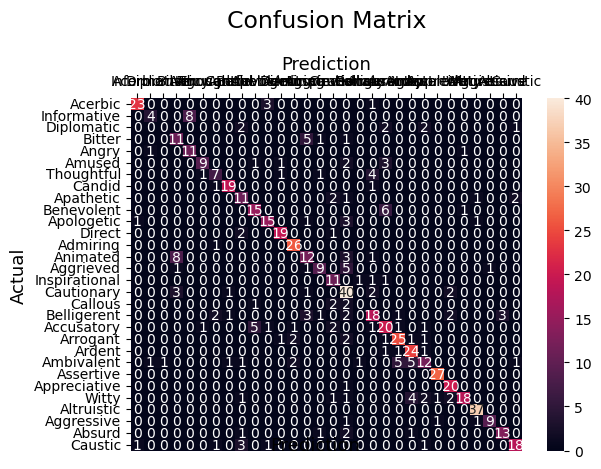

In [161]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.tight_layout()

In [162]:
print(classification_report(y_test, preds))

               precision    recall  f1-score   support

       Absurd       0.92      0.85      0.88        27
   Accusatory       0.67      0.33      0.44        12
      Acerbic       0.00      0.00      0.00         7
     Admiring       0.48      0.61      0.54        18
   Aggressive       0.58      0.85      0.69        13
    Aggrieved       0.82      0.56      0.67        16
   Altruistic       0.58      0.50      0.54        14
   Ambivalent       0.86      0.90      0.88        21
       Amused       0.52      0.65      0.58        17
        Angry       0.68      0.68      0.68        22
     Animated       0.75      0.71      0.73        21
    Apathetic       0.86      0.86      0.86        22
   Apologetic       0.84      0.96      0.90        27
 Appreciative       0.52      0.50      0.51        24
       Ardent       0.69      0.53      0.60        17
     Arrogant       0.58      0.79      0.67        14
    Assertive       0.61      0.82      0.70        49
  Bellige

In [199]:
def tonality(text):
    embedding = getEmbeddings(text)
    x = np.array(embedding).reshape(1, -1)
    pred = model.predict(x)
    pred = LE.inverse_transform(pred)
    return pred[0]

In [221]:
import dill

In [224]:
# Save the necessary components into a dictionary
to_pickle = {
    'tonality': tonality,
    'model': model,
    'LE': LE,
    'getEmbeddings': getEmbeddings
}

# Dump everything into a pickle file
with open('tonality_model.pkl', 'wb') as f:
    dill.dump(to_pickle, f)
with open('tonality_model.pkl', 'rb') as f:
    loaded_data = dill.load(f)

# Extract the components from the loaded data
loaded_tonality = loaded_data['tonality']
loaded_model = loaded_data['model']
loaded_LE = loaded_data['LE']
loaded_getEmbeddings = loaded_data['getEmbeddings']

# Now you can use the loaded components
pred = loaded_tonality("Please run")
print(pred)

Direct


In [225]:
import joblib

In [226]:
joblib.dump(tonality, 'model_tonality.pkl')

['model_tonality.pkl']

In [227]:
clf2 = joblib.load("model_tonality.pkl")

In [228]:
clf2("Please run")

'Direct'

In [230]:
with open ("tonality_model.pk", 'wb') as f:
    pickle.dump(model, f)
with open ("tonality_embedding.pk", 'wb') as f:
    pickle.dump(modelEmbedding, f)
with open ("tonality_LE.pk", 'wb') as f:
    pickle.dump(LE, f)